🧠 Mejor combinación (val set):
n_estimators=10, max_depth=2, acc=0.92
n_estimators=10, max_depth=4, acc=0.96
n_estimators=10, max_depth=6, acc=0.97
n_estimators=10, max_depth=None, acc=0.97
n_estimators=50, max_depth=2, acc=0.91
n_estimators=50, max_depth=4, acc=0.95
n_estimators=50, max_depth=6, acc=0.97
n_estimators=50, max_depth=None, acc=0.97
n_estimators=100, max_depth=2, acc=0.91
n_estimators=100, max_depth=4, acc=0.96
n_estimators=100, max_depth=6, acc=0.97
n_estimators=100, max_depth=None, acc=0.97
🎯 Precisión final en test: 0.94


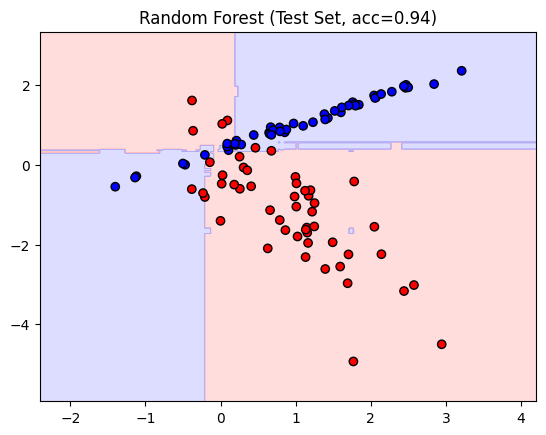

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Datos simulados 2D para visualizar
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           random_state=42)

# Train + val y test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train y val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  
# 60% train, 20% val, 20% test

def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['red', 'blue']))
    plt.title(title)
    plt.show()

best_acc = 0
best_model = None
results = []

for n_estimators in [10, 50, 100]:
    for max_depth in [2, 4, 6, None]:
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred_val = clf.predict(X_val)
        acc = accuracy_score(y_val, y_pred_val)
        results.append((n_estimators, max_depth, acc))
        
        if acc > best_acc:
            best_acc = acc
            best_model = clf

# Mostramos la mejor combinación
print("Mejor combinación (val set):")
for n, d, acc in results:
    print(f"n_estimators={n}, max_depth={d}, acc={acc:.2f}")

y_pred_test = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print(f"Precisión final en test: {test_acc:.2f}")

# Graficamos la frontera
plot_decision_boundary(best_model, X_test, y_test, f'Random Forest (Test Set, acc={test_acc:.2f})')
